In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = False
%matplotlib inline

# Problem 1 
### (a)
Implement a pseudorandom generator of your choice and use it to generate 1000 uniformly distributed points in $[0,1]$.
In your report, reflect your opinion how random your generator is.

In [2]:
def generate_lcg(iter):
    """
    Linear congruential generator to generate pseudorandom uniformly distributied points in [0,1]
    :param iter: number of simulated variables (int)
    :return u: Vector of uniformly distributied points in [0,1] (list)
    """
    # Inital variables
    x = 147              # Seed
    a = 1103515245       # Multiplier
    c = 12345            # Increment
    m = (2 ** 31)        # modulus
    u = []               # Output vector
    
    # Loop for number of iterations
    for num in range(iter):
        # LCG formula
        x = (a * x + c) % m

        # Solve uniformly distributied points in [0,1]
        u.append(x/m)

    return u

def NormalizeData(data):
    """
    Normalize data in [0,1]
    :param data: defined size
    :return out: Vector of Normalize data in [0,1]
    """
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [3]:
iter = 1000 # Number of points
U = generate_lcg(iter) # Simulate uniformly distributied point

mu = np.mean(U) # Mean of uniformly distributied points
sigma = np.var(U) # Variance of uniformly distributied point

print(f'Mean of U is {mu}')
print(f'Variance of U is {sigma}')

Mean of U is 0.5014279581662268
Variance of U is 0.08006437100293842


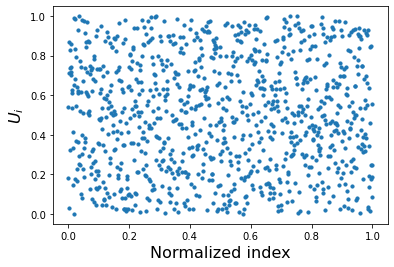

In [4]:
# (Figure 1) Generated U_i's as a function of the normalized index
plt.figure(1)
plt.scatter(NormalizeData(range(len(U))), U, s=10)
plt.ylabel('$U_i$', fontsize=16)
plt.xlabel('Normalized index', fontsize=16)
plt.show()

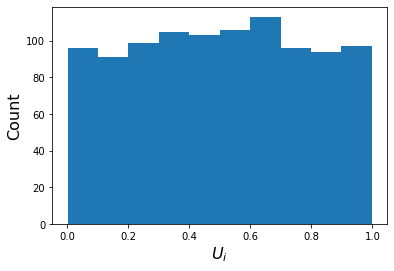

In [5]:
# (Figure 2) Count as a function of the generated U_i's
plt.figure(2)
plt.hist(U,bins=10)
plt.ylabel('Count',fontsize=16)
plt.xlabel('$U_i$',fontsize=16)
plt.show()

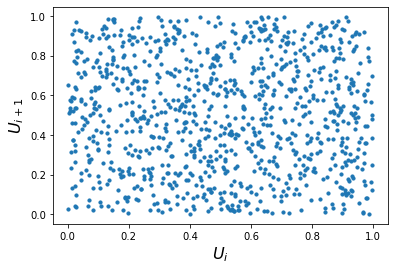

In [6]:
# Vectors for Figure 3
U1=U[1:iter-1]
U2=U[2:iter]

# (Figure 3) generated U_{i+1}'s as a function of U_i
plt.figure(3)
plt.scatter(U1, U2, s=10)
plt.xlabel('$U_i$', fontsize=16)
plt.ylabel('$U_{i+1}$', fontsize=16)
plt.show()

In [7]:
# Kolmogorov-Smirnov test
stat, p = stats.kstest(U, stats.uniform(loc=0.0, scale=1).cdf)
print(f'Kolmogorov-Smirnov-test statistic {stat} and p-value {p} for 95% confidence level')

Kolmogorov-Smirnov-test statistic 0.017821583081036818 and p-value 0.9027925996219108 for 95% confidence level


### (b)
Making use of part (a), generate 1000 values distributed according to a Gumbel distribution with 
cumulative distribution function $F(x) = e^{−e^{−x}}$. Represent the outcome in a plot.

In [8]:
def gumbel_icdf(U):
    """
    Inverse transform method applied to Gumbel distribution
    :param U: Uniform distributed data
    :return out: Gumbel distribution 
    """
    return -np.log(-np.log(U))

In [9]:
# Generate Gumbel distribution (iter=1000)
x = gumbel_icdf(U)

# Gumbel distribution analytical solution
x_analytical = np.random.gumbel(loc=0.0, scale=1.0, size=100000)

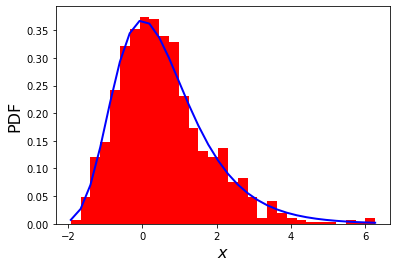

In [10]:
# (Figure 4) PDF plot for Gumbel distribution with analytical PDF
plt.figure(4)
count, bins, ignored = plt.hist(x, 31, color='red', density=True, linewidth=2)
plt.plot(bins, np.exp(-bins)* np.exp(-np.exp(-bins)), linewidth=2, color='b')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('PDF',fontsize=16)
plt.show()

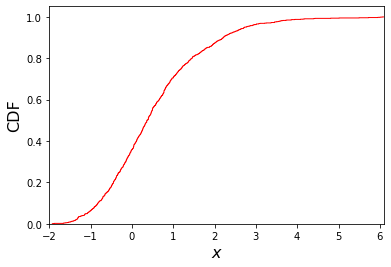

In [11]:
# (Figure 5) CDF plot for Gumbel distribution
plt.figure(5)
plt.hist(x, bins=1000, density=True, cumulative=True, label='CDF',
         histtype='step', color='r')
plt.xlim(-2,6.1)
plt.xlabel('$x$',fontsize=16)
plt.ylabel('CDF',fontsize=16)
plt.show()

# Problem 2
### (a)

In [12]:
def points_on_triangle(iter):
    """
    Give iter random points uniformly on a triangle where the vertices are given by (0,0), (0,2), and (2,2).

    :param iter: number of points
    :out: random points uniformly on a triangle
    """
    v = np.array([(0, 0), (0, 2), (2, 2)]) # Vertices
    x = np.sort(np.random.rand(2, iter), axis=0)
    return np.column_stack([x[0], x[1]-x[0], 1-x[1]]) @ v
def points_on_triangle_inv(iter):
    """
    Give iter random points uniformly on a triangle where the vertices are given by (0,0), (0,2), and (2,2).

    :param iter: number of points
    :out: random points uniformly on a triangle
    """
    v = np.array([(0, 0), (0, 2), (2, 2)])
    x = np.sort(np.random.rand(2, iter), axis=0)
    return np.column_stack([1-x[0], -x[1]+x[0], x[1]]) @ v

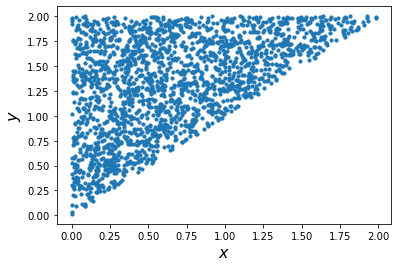

In [13]:
iter = 2000 # Number of iterations
points = points_on_triangle(iter) # Simulate points on triangle
x, y = zip(*points)  # Aggregate into tuple

# (Figure 6) Plot of uniformly generated poitns on triangle
plt.figure(6)
plt.scatter(x, y, s=10)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

### (b)

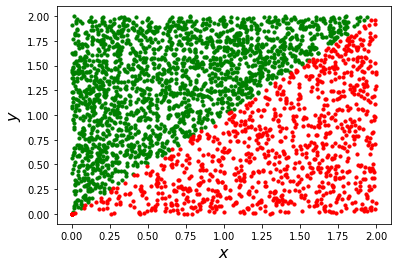

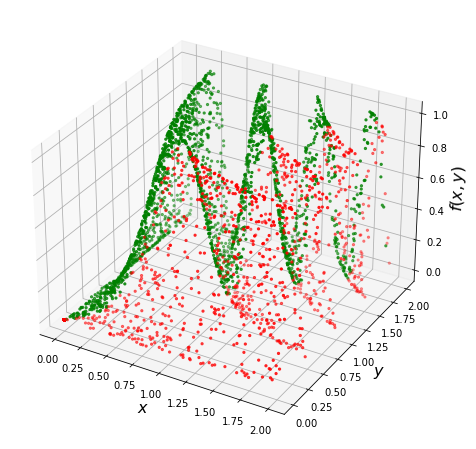

In [42]:
def f(x,y):
    return np.sin(np.pi*x*y)**2
iter = 2000

i = 0
x_accept = np.zeros(iter)
y_accept = np.zeros(iter)
x_reject = np.zeros(iter)
y_reject = np.zeros(iter)
while i < iter:
    x = np.random.random()*2
    y = np.random.random()*2
    if y >= x:
        x_accept[i] = x
        y_accept[i] = y
        i = i + 1
    else:
        x_reject[i] = x
        y_reject[i] = y
        
plt.scatter(x_accept,y_accept,s=10,color='green')
plt.scatter(x_reject,y_reject,s=10,color='red')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_accept, y_accept, f(x_accept,y_accept), s=5, color='green')
ax.scatter(x_reject, y_reject, f(x_reject,y_reject), s=5, color='red')
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$f(x,y)$', fontsize=16);
plt.show()

# 3


In [154]:
def MonteCarlo(S0, r, T, sigma, W, N):
    """
    Monte Carlo simulation of a stock price
    :param S0: initial stock price
    :param r: risk-free interest rate
    :param T: time to maturity
    :param sigma: volatility
    :param W: Brownian motion
    :param N: number of time steps
    :return: simulated stock price
    """
    # Time steps
    dt = T / N
    # Empty stock vector
    S = np.zeros(N)
    # Assign initial stock price
    S[0] = S0
    # Time loop
    for i in range(1, N):
        # Simulate stock movement
        S[i] = S[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * W[i] * np.sqrt(dt))
    return S

In [159]:
def AsianBasket(S0, K, r, T, sigma, Corr, M, N):
    """
    Calculates the price of an Asian basket option using Monte Carlo simulation with correlated Brownian motion.
    
    :param S0: Vector of initial stock prices.
    :param K: Strike price
    :param r: Risk-free interest rate
    :param T: Time to maturity
    :param sigma: Vector of volatilities
    :param Corr: Correlation matrix
    :param N: Number of time steps
    :Param M: Number of simulations
    :out mean_price: Mean price of the option
    :out CI: 95% confidence interval
    :out std_price: Standard deviation of the price
    """
    price = np.zeros(M) # Empty price vector
    for j in range(M): # Simulation loop
        S = np.zeros([3,N]) # Empty stock matrix
        
        # Generate correlated Brownian motions
        Z1 = np.random.normal(size=(N, 1))
        Z2 = Corr[0][1] * Z1 + np.sqrt(1 - Corr[0][1] ** 2) * np.random.normal(size=(N, 1))
        Z3 = Corr[0][2] * Z1 + Corr[1][2] * Z2 + np.sqrt(1 - Corr[0][2] ** 2 - Corr[1][2] ** 2 - 2 * 
                                               Corr[0][1] * Corr[0][2] * Corr[1][2])* np.random.normal(size=(N, 1))
        
        # Simulate stock prices
        S[0,:] = MonteCarlo(S0[0], r, T, sigma[0], Z1, N)
        S[1,:] = MonteCarlo(S0[1], r, T, sigma[1], Z2, N)
        S[2,:] = MonteCarlo(S0[2], r, T, sigma[2], Z3, N)
        
        # Calculate the basket stock price
        Shat = (S[0,:] + S[1,:] + S[2,:])
        
        # Calculate the price of the option
        price[j] = np.maximum(K-np.mean(Shat),0)*np.exp(-r*T)
        
    mean_price = np.mean(price) # Mean price
    std_price = np.std(price) # Standard deviation
    # Confidence interval
    CI = [mean_price - 1.96*std_price/np.sqrt(N), mean_price + 1.96*std_price/np.sqrt(N)]
    return mean_price, CI, std_price

In [160]:
S0 = np.array([40,40,70]) # Inital stock prices for S_1, S_2, and S_3
K = 150 # Strike price
T = 0.5 # Expiration in 6 months
N = 60 # Number of observations per year
r = 0.02 # Interest rate
sigma = np.array([0.2,0.3,0.4]) # Initial volatility
rho12, rho23, rho13 = 0.2, -0.1, -0.2 # Correlation coefficients
Corr = np.array([(1, rho12, rho13), (rho12, 1, rho23), (rho13, rho23, 1)]) # Correlation matrix
M = 1000  #Number of simulations

In [161]:
N = np.linspace(30,300,10, dtype=int) # Vector for number of monitoring dates 
mean_price = np.zeros([M,len(N)]) # Empty matrix for F0
CIs = np.zeros([len(N),2]) # Empty matrix for confidence interval
std_price = np.zeros([len(N),1]) # Empty vector for standard deviation
for j in range(len(N)): # loop for monitoring dates
    # Simulate basket Asian put
    mean_price[:,j], CIs[j], std_price[j] = AsianBasket(S0, K, r, T, sigma, Corr, M, N[j])

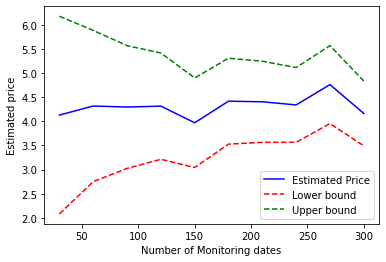

In [162]:
line1, = plt.plot(N,np.mean(mean_price,axis=0),'b', label='Estimated Price')
line2, = plt.plot(N,CIs[:,0], 'r--', label='Lower bound')
line3, = plt.plot(N,CIs[:,1], 'g--', label='Upper bound')
plt.xlabel('Number of Monitoring dates')
plt.ylabel('Estimated price')
plt.legend(handles=[line1, line2, line3])

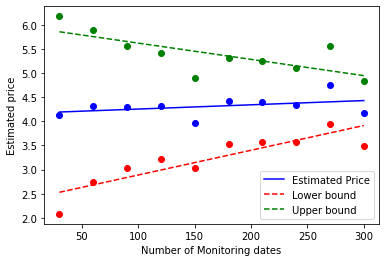

In [163]:
plt.scatter(N,np.mean(mean_price,axis=0),color='b')
plt.scatter(N,CIs[:,0],color='r')
plt.scatter(N,CIs[:,1],color='g')
N = N.reshape((-1, 1))
m1 = LinearRegression().fit(N, np.mean(mean_price,axis=0))
y1 = m1.predict(N)
m2 = LinearRegression().fit(N, CIs[:,0])
y2 = m2.predict(N)
m3 = LinearRegression().fit(N, CIs[:,1])
y3 = m3.predict(N)
line1, = plt.plot(N,y1,'b', label='Estimated Price')
line2, = plt.plot(N,y2, 'r--', label='Lower bound')
line3, = plt.plot(N,y3, 'g--', label='Upper bound')
plt.xlabel('Number of Monitoring dates')
plt.ylabel('Estimated price')
plt.legend(handles=[line1, line2, line3])

### Antithetic variates

In [164]:
def MonteCarlo_av(S0, r, T, sigma, W, N):
    """
    Computes the Monte Carlo simulation of the price of a stock with antithetic variates
    :param S0: initial price of the stock
    :param r: risk-free interest rate
    :param T: maturity
    :param sigma: volatility
    :param W: Brownian motion
    :param N: number of steps
    :return: the price of the stock at maturity
    """
    # Time steps
    dt = T / N
    # Empty stock vector
    S1, S2 = np.zeros(N), np.zeros(N)
    # Initial stock price
    S1[0], S2[0] = S0, S0
    # timestep loop
    for i in range(1, N):
        # Simulate stocks
        S1[i] = S1[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * W[i] * np.sqrt(dt))
        S2[i] = S2[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * (-W[i]) * np.sqrt(dt))
    return S1,S2

In [165]:
def AsianBasket_av(S0, K, r, T, sigma, Corr, M, N):
    """
    Calculates the price of an Asian basket option using Monte Carlo simulation with correlated Brownian motion and antithetic variates
    
    :param S0: Vector of initial stock prices.
    :param K: Strike price
    :param r: Risk-free interest rate
    :param T: Time to maturity
    :param sigma: Vector of volatilities
    :param Corr: Correlation matrix
    :param N: Number of time steps
    :Param M: Number of simulations
    :out mean_price: Mean price of the option
    :out CI: 95% confidence interval
    :out std_price: Standard deviation of the price
    """
    # empty price vector
    price = np.zeros(M)
    for j in range(M):
        S1,S2 = np.zeros([3,N]),np.zeros([3,N]) # Empty stock matrix
        # Generate correlated Brownian motions
        Z1 = np.random.normal(size=(N, 1))
        Z2 = Corr[0][1] * Z1 + np.sqrt(1 - Corr[0][1] ** 2) * np.random.normal(size=(N, 1))
        Z3 = Corr[0][2] * Z1 + Corr[1][2] * Z2 + np.sqrt(1 - Corr[0][2] ** 2 - Corr[1][2] ** 2 - 2 * 
                                               Corr[0][1] * Corr[0][2] * Corr[1][2])* np.random.normal(size=(N, 1))
        
        # Simulate stock prices
        S1[0,:], S2[0,:]  = MonteCarlo_av(S0[0], r, T, sigma[0], Z1, N)
        S1[1,:], S2[1,:]  = MonteCarlo_av(S0[1], r, T, sigma[1], Z2, N)
        S1[2,:], S2[2,:]  = MonteCarlo_av(S0[2], r, T, sigma[2], Z3, N)
        
        # Calculate the basket stock price
        Shat1 = S1[0,:] + S1[1,:] + S1[2,:]
        Shat2 = S2[0,:] + S2[1,:] + S2[2,:]
        
        # Calculate the price of the option
        price[j] = (np.maximum(K-np.mean(Shat1),0)+np.maximum(K-np.mean(Shat2),0))/2*np.exp(-r*T)
        
    mean_price = np.mean(price) # Mean payoff
    std_price = np.std(price) # Standard deviation
    CI = [mean_price - 1.96*std_price/np.sqrt(N), mean_price + 1.96*std_price/np.sqrt(N)]
    return mean_price, CI, std_price

In [166]:
N = np.linspace(30,300,10, dtype=int) # Vector for number of monitoring dates 
mean_price = np.zeros([int(M),len(N)]) # Empty matrix for F0
CIs = np.zeros([len(N),2]) # Empty matrix for confidence interval
std_price = np.zeros([len(N),1]) # Empty vector for standard deviation
for j in range(len(N)): # loop for monitoring dates
    # Simulate basket Asian put with antithetic variates
    mean_price[:,j], CIs[j], std_price[j] = AsianBasket_av(S0, K, r, T, sigma, Corr, M, N[j])

array([[4.03892695, 4.34615563, 4.36393271, ..., 4.31213945, 4.36329796,
        4.29031616],
       [4.03892695, 4.34615563, 4.36393271, ..., 4.31213945, 4.36329796,
        4.29031616],
       [4.03892695, 4.34615563, 4.36393271, ..., 4.31213945, 4.36329796,
        4.29031616],
       ...,
       [4.03892695, 4.34615563, 4.36393271, ..., 4.31213945, 4.36329796,
        4.29031616],
       [4.03892695, 4.34615563, 4.36393271, ..., 4.31213945, 4.36329796,
        4.29031616],
       [4.03892695, 4.34615563, 4.36393271, ..., 4.31213945, 4.36329796,
        4.29031616]])

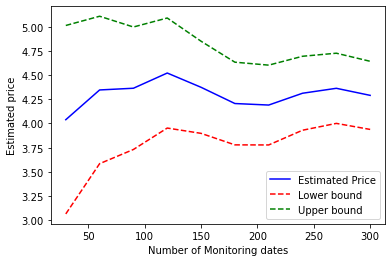

In [167]:
line1, = plt.plot(N,np.mean(mean_price,axis=0),'b', label='Estimated Price')
line2, = plt.plot(N,CIs[:,0], 'r--', label='Lower bound')
line3, = plt.plot(N,CIs[:,1], 'g--', label='Upper bound')
plt.xlabel('Number of Monitoring dates')
plt.ylabel('Estimated price')
plt.legend(handles=[line1, line2, line3])
mean_price

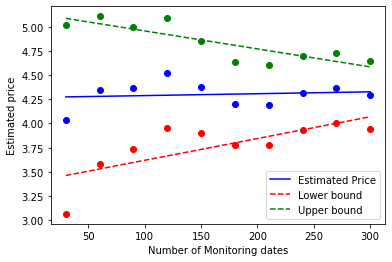

In [168]:
plt.scatter(N,np.mean(mean_price,axis=0),color='b')
plt.scatter(N,CIs[:,0],color='r')
plt.scatter(N,CIs[:,1],color='g')
N = N.reshape((-1, 1))
m1 = LinearRegression().fit(N, np.mean(mean_price,axis=0))
y1 = m1.predict(N)
m2 = LinearRegression().fit(N, CIs[:,0])
y2 = m2.predict(N)
m3 = LinearRegression().fit(N, CIs[:,1])
y3 = m3.predict(N)
line1, = plt.plot(N,y1,'b', label='Estimated Price')
line2, = plt.plot(N,y2, 'r--', label='Lower bound')
line3, = plt.plot(N,y3, 'g--', label='Upper bound')
plt.xlabel('Number of Monitoring dates')
plt.ylabel('Estimated price')
plt.legend(handles=[line1, line2, line3])

# Problem 4


In [460]:
def CoC_av(S0, L, K, T1, T2, r, sigma, N, M):
    c = np.zeros(M)
    F0 = np.zeros(M)
    W = np.random.randn(N,M)
    S = np.random.randn(N,M)
    for j in range(M):
        S[:,j] = MonteCarlo(S0, r, T1, sigma, W[:,j], N)
        c[j] = blsprice_mc_av(S[-1,j], L, T2-T1, r, sigma)
        F0[j] = np.maximum(c[j]-K,0)*np.exp(-r*(T1))
    return F0

In [472]:
def CoC_cv(S0, L, K, T1, T2, r, sigma, N, M):
    c = np.zeros(M)
    F0 = np.zeros(M)
    W = np.random.randn(N,M)
    S = np.random.randn(N,M)
    for j in range(M):
        S[:,j] = MonteCarlo(S0, r, T1, sigma, W[:,j], N)
        c[j] = blsprice_mc_cv(S[-1,j], L, T2-T1, r, sigma)
        F0[j] = np.maximum(c[j]-K,0)*np.exp(-r*(T1))
    return F0

In [492]:
F0 = CoC_cv(S0, L, K, T1, T2, r, sigma, 100,1000)
F0_1 = CoC(S0, L, K, T1, T2, r, sigma, 100,1000)
C0 = np.mean(F0)
SE = np.std(F0)/100
C0w = np.mean(F0_1)
SEw = np.std(F0_1)/100

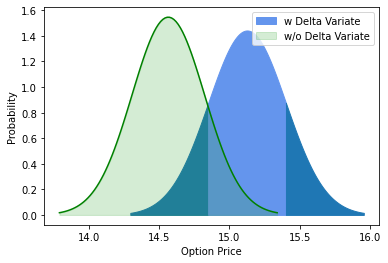

In [493]:
x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)
xw = np.linspace(C0w-3*SEw, C0w+3*SEw, 100)
s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)
sw = stats.norm.pdf(xw, C0w, SEw)
plt.fill_between(x1, s1, color='tab:blue')
plt.fill_between(x2, s2, color='cornflowerblue',label='w Delta Variate')
plt.fill_between(x3, s3, color='tab:blue')
plt.plot(xw, sw, 'g-')
plt.fill_between(xw, sw, alpha=0.2, color='tab:green', label='w/o Delta Variate')
plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

# (4)

In [189]:
def simulate_stock_price(S0, r, T, sigma, N):
    """
    Simulate a stock price using the geometric Brownian motion model
    :param S0: initial stock price
    :param r: risk-free interest rate
    :param T: time to maturity
    :param sigma: volatility
    :return: simulated stock price at time T
    """
    dt = T / N
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        W = np.random.randn()
        S[i] = S[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * W * np.sqrt(dt))
    return S[-1]

In [458]:
def blsprice_mc(S0, K, T, r, sigma, N, M):
    """
    Calculate the price of a European call option using Monte Carlo simulation
    """
    S = np.zeros((M))
    for j in range(M):
        S[j] = simulate_stock_price(S0, r, T, sigma, N)
    F0 = np.maximum(S[:]-K,0)*np.exp(-r*T)
    return np.mean(F0)

In [191]:
def call_on_call_option_price(S0, L, K, T1, T2, r, sigma, N, M):
    """
    Calculate the price of a call option on a call option using Monte Carlo simulation
    :param S0: initial stock price
    :param L: strike price of the underlying call option
    :param K: strike price of the call option on the call option
    :param T1: time to maturity of the call option on the call option
    :param T2: time to maturity of the underlying call option
    :param r: risk-free interest rate
    :param sigma: volatility
    :param N: number of time steps for the Monte Carlo simulation
    :param M: number of Monte Carlo simulations
    :return: price of the call option on the call option
    :return: standard deviation of the call option on the call option
    """
    F0 = np.zeros(M)
    Payoff = np.zeros(M)
    for j in range(M):
        # Generate stock price path
        S = simulate_stock_price(S0, r, T2, sigma, N)
        # Calculate price of underlying call option
        Payoff[j] = blsprice_mc(S, L, T1 - T2, r, sigma, N, M)
        # Calculate payoff of call option on call option
        F0[j] = np.maximum(Payoff[j] - K, 0) * np.exp(-r * T2)
    # Return average of all payoffs
    return np.mean(F0), np.std(F0)

In [192]:
def blsprice_mc_cv(S0, K, T, r, sigma, N, M):
    S = np.zeros((N,M))
    W = np.random.randn(N,M)
    cv = np.zeros(M)
    for j in range(M):
        S[:,j], cv[j] = MonteCarlo_cv(S0, K, r, T, sigma, W[:,j], N)
    F0 = (np.maximum(S[-1,:]-K,0)-cv[:])*np.exp(-r*T)
    return np.mean(F0)

In [193]:
def MonteCarlo_cv(S0, K, r, T, sigma, W, N):
    """
    Monte Carlo simulation of a European call option with delta control variate
    :param S0: Initial stock price
    :param K: Strike price
    :param r: Risk-free rate
    :param T: Time to maturity
    :param sigma: Volatility
    :param W: Brownian motion
    :param N: Number of time steps
    :return: S, cv
    """
    dt = T / N # Time steps
    S = np.zeros(N) # Empty stock vector
    S[0] = S0 # Assign initial stock price
    for i in range(1, N): # Time loop
        # Simulate stock movement
        S[i] = S[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * W[i] * np.sqrt(dt))
    deltaS = -np.exp(-r*T)*S[-1]/S0
    cv = deltaS*(S[-1] - S[-2]*np.exp(r*T))
    return S,cv

In [364]:
def MonteCarlo_cv(S0, K, r, T, sigma, N):
    """
    Monte Carlo simulation of a European call option with delta control variate
    :param S0: Initial stock price
    :param K: Strike price
    :param r: Risk-free rate
    :param T: Time to maturity
    :param sigma: Volatility
    :param W: Brownian motion
    :param N: Number of time steps
    :return: S, cv
    """
    dt = T / N # Time steps
    S = np.zeros(N) # Empty stock vector
    S[0] = S0 # Assign initial stock price
    import scipy 
    for i in range(1, N): # Time loop
        # Simulate stock movement
        W = np.random.randn()
        S[i] = S[i-1] * np.exp((np.log(K/S0) - sigma ** 2 / 2) * dt + sigma * W * np.sqrt(dt))
    return S

In [457]:
def BetaEstimation(X,Y):
    num = 0
    denom = 0
    e1,e2 =  np.mean(X), np.mean(Y)
    for i,x in enumerate(X):
        num += (X[i] - e1) * (Y[i] - e2)
        denom += (X[i] - e1) ** 2
    return num/denom
def blsprice_mc_cv(S0, K, T, r, sigma, N, M):
    S = np.zeros((N,M))
    Y = np.zeros(M)
    test = np.zeros(M)
    b = 0
    for j in range(M):
        S[:,j] = MonteCarlo_cv(S0, K, r, T, sigma, N)
    Y = (np.maximum(S[-1,:]-K,0))*np.exp(-r*T)
    C = Y - BetaEstimation(S[-1,:],Y) * (S[-1,:]-S0*np.exp(r*T))
    return np.mean(C)

In [5]:
print(blsprice_mc_cv(14, 15, 1, 0.01, 0.25, 1000, 100))
print(blsprice_mc(14, 15, 1, 0.01, 0.25, 1000, 100))

0.9255739745591134
1.1024891071469818


In [340]:
def call_on_call_option_price_cv(S0, L, K, T1, T2, r, sigma, N, M):
    """
    Calculate the price of a call option on a call option using Monte Carlo simulation
    :param S0: initial stock price
    :param L: strike price of the underlying call option
    :param K: strike price of the call option on the call option
    :param T2: time to maturity of the call option on the call option
    :param T1: time to maturity of the underlying call option
    :param r: risk-free interest rate
    :param sigma: volatility
    :param N: number of time steps for the Monte Carlo simulation
    :param M: number of Monte Carlo simulations
    :return: price of the call option on the call option
    """
    F0 = np.zeros(M)
    Payoff = np.zeros(M)
    test = np.zeros(M)
    for j in range(M):
        # Generate stock price path
        S = simulate_stock_price(S0, r, T2, sigma, N)
        # Calculate price of underlying call option
        Payoff[j] = blsprice_mc_cv(S, L, T1-T2, r, sigma, N, M)
        # Calculate payoff of call option on call option
        F0[j] = np.maximum(Payoff[j] - K, 0) * np.exp(-r * T2)
    # Return average of all payoffs
    return np.mean(F0), np.std(F0)

In [461]:
S0 = 380 # Inital stock price
L = [300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500] # Strike price
K = 36 # Strike price CC
T2 = 3/12 # Expiration in 3 months
T1 = 12/12 # Expiration in 12 months
r = 0.025 # Interest rate
sigma = 0.3 # Volatility
M = 100  # Number of simulations
N = 100 # Number of time steps

price = np.zeros(len(L))
std = np.zeros(len(L))
price_cv = np.zeros(len(L))
std_cv = np.zeros(len(L))
for i in range(len(L)):
    price[i], std[i] = call_on_call_option_price(S0, L[i], K, T1, T2, r, sigma, N, M)
    price_cv[i], std_cv[i] = call_on_call_option_price_cv(S0, L[i], K, T1, T2, r, sigma, N, M)

Text(0.5, 0, 'Option Price')

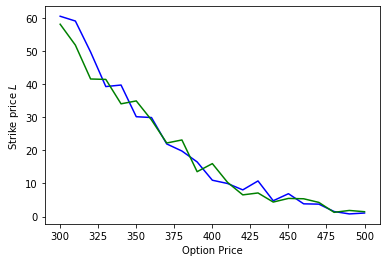

In [462]:
plt.plot(L,price,color='blue' , label='w/o Delta Variate')
plt.plot(L,price_cv,color='green', label='w Delta Variate')
plt.ylabel("Strike price $L$")
plt.xlabel("Option Price")

In [478]:
L = 400
M = 1000
price, std = call_on_call_option_price(S0, L, K, T1, T2, r, sigma, N, M)
price_cv, std_cv = call_on_call_option_price_cv(S0, L, K, T1, T2, r, sigma, N, M)

KeyboardInterrupt: 

In [ ]:
std = std/100
std_cv = std_cv/100
x = np.linspace(price-3*std, price+3*std, 100)
xw = np.linspace(price_cv-3*std_cv, price_cv+3*std_cv, 100)
s = stats.norm.pdf(x, price, std)
sw = stats.norm.pdf(xw, price_cv, std_cv)
plt.fill_between(x, s, color='tab:blue', label='w/o Delta Variate')
plt.fill_between(xw, sw, color='tab:green',alpha=0.5, label='w Delta Variate')
plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

In [405]:
price_cv

4.492718041397394

In [408]:
X = [[1,2],[3,4]]

In [413]:
np.mean(X,axis=0)

array([2., 3.])

In [414]:
X

[[1, 2], [3, 4]]

# (4)

In [2]:
def simulate_stock_price(S0, r, T, sigma, N):
    """
    Simulate a stock price using the geometric Brownian motion model
    :param S0: initial stock price
    :param r: risk-free interest rate
    :param T: time to maturity
    :param sigma: volatility
    :return: simulated stock price at time T
    """
    dt = T / N
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        W = np.random.randn()
        S[i] = S[i-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * W * np.sqrt(dt))
    return S[-1]
def blsprice_mc(S0, K, T, r, sigma, N, M):
    """
    Calculate the price of a European call option using Monte Carlo simulation
    """
    S = np.zeros((M))
    for j in range(M):
        S[j] = simulate_stock_price(S0, r, T, sigma, N)
    C = np.maximum(S-K,0)*np.exp(-r*T)
    return np.mean(C)
def call_on_call_option_price(S0, L, K, T1, T2, r, sigma, N, M):
    """
    Calculate the price of a call option on a call option using Monte Carlo simulation
    :param S0: initial stock price
    :param L: strike price of the underlying call option
    :param K: strike price of the call option on the call option
    :param T1: time to maturity of the call option on the call option
    :param T2: time to maturity of the underlying call option
    :param r: risk-free interest rate
    :param sigma: volatility
    :param N: number of time steps for the Monte Carlo simulation
    :param M: number of Monte Carlo simulations
    :return: price of the call option on the call option
    :return: standard deviation of the call option on the call option
    """
    F0 = np.zeros(M)
    Payoff = np.zeros(M)
    for j in range(M):
        # Generate stock price path
        S = simulate_stock_price(S0, r, T2, sigma, N)
        # Calculate price of underlying call option
        Payoff[j] = blsprice_mc(S, L, T1 - T2, r, sigma, N, M)
        # Calculate payoff of call option on call option
        F0[j] = np.maximum(Payoff[j] - K, 0) * np.exp(-r * T2)
    # Return average of all payoffs
    return np.mean(F0), np.std(F0)

In [3]:
def BetaEstimation(X,Y):
    num = 0
    denom = 0
    e1,e2 =  np.mean(X), np.mean(Y)
    for i,x in enumerate(X):
        num += (X[i] - e1) * (Y[i] - e2)
        denom += (X[i] - e1) ** 2
    return num/denom
def blsprice_mc_cv(S0, K, T, r, sigma, N, M):
    """
    Calculate the price of a European call option using Monte Carlo simulation
    """
    S = np.zeros((M))
    for j in range(M):
        S[j] = simulate_stock_price(S0, r, T, sigma, N)
    F0 = np.maximum(S-K,0)*np.exp(-r*T)
    C = F0 - BetaEstimation(S,F0) * (S-S0*np.exp(r*T))
    return np.mean(C)
def call_on_call_option_price_cv(S0, L, K, T1, T2, r, sigma, N, M):
    """
    Calculate the price of a call option on a call option using Monte Carlo simulation
    :param S0: initial stock price
    :param L: strike price of the underlying call option
    :param K: strike price of the call option on the call option
    :param T1: time to maturity of the call option on the call option
    :param T2: time to maturity of the underlying call option
    :param r: risk-free interest rate
    :param sigma: volatility
    :param N: number of time steps for the Monte Carlo simulation
    :param M: number of Monte Carlo simulations
    :return: price of the call option on the call option
    :return: standard deviation of the call option on the call option
    """
    F0 = np.zeros(M)
    Payoff = np.zeros(M)
    for j in range(M):
        # Generate stock price path
        S = simulate_stock_price(S0, r, T2, sigma, N)
        # Calculate price of underlying call option
        Payoff[j] = blsprice_mc(S, L, T1 - T2, r, sigma, N, M)
        # Calculate payoff of call option on call option
        F0[j] = np.maximum(Payoff[j] - K, 0) * np.exp(-r * T2)
    # Return average of all payoffs
    return np.mean(F0), np.std(F0)

In [8]:
S0 = 380 # Inital stock price
L = 400 # Strike price
K = 36 # Strike price CC
T2 = 3/12 # Expiration in 3 months
T1 = 12/12 # Expiration in 12 months
r = 0.025 # Interest rate
sigma = 0.3 # Volatility
M = 100  # Number of simulations
N = 100 # Number of time steps
price, std = call_on_call_option_price(S0, L, K, T1, T2, r, sigma, N, M)
price_cv, std_cv = call_on_call_option_price_cv(S0, L, K, T1, T2, r, sigma, N, M)

In [9]:
print(price)
print(price_cv)

14.063480283242225
17.048987451956055


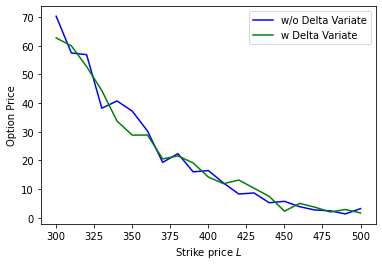

In [14]:
S0 = 380 # Inital stock price
L = [300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500] # Strike price
K = 36 # Strike price CC
T2 = 3/12 # Expiration in 3 months
T1 = 12/12 # Expiration in 12 months
r = 0.025 # Interest rate
sigma = 0.3 # Volatility
M = 100  # Number of simulations
N = 100 # Number of time steps

price = np.zeros(len(L))
std = np.zeros(len(L))
price_cv = np.zeros(len(L))
std_cv = np.zeros(len(L))
for i in range(len(L)):
    price[i], std[i] = call_on_call_option_price(S0, L[i], K, T1, T2, r, sigma, N, M)
    price_cv[i], std_cv[i] = call_on_call_option_price_cv(S0, L[i], K, T1, T2, r, sigma, N, M)
plt.plot(L,price,color='blue' , label='w/o Delta Variate')
plt.plot(L,price_cv,color='green', label='w Delta Variate')
plt.xlabel("Strike price $L$")
plt.ylabel("Option Price")
plt.legend()
plt.show()

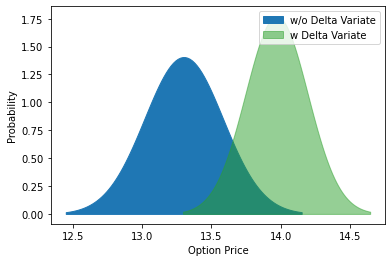

In [27]:
L = 400
M = 100
price, std = call_on_call_option_price(S0, L, K, T1, T2, r, sigma, N, M)
price_cv, std_cv = call_on_call_option_price_cv(S0, L, K, T1, T2, r, sigma, N, M)
std = std/100
std_cv = std_cv/100
x = np.linspace(price-3*std, price+3*std, 100)
xw = np.linspace(price_cv-3*std_cv, price_cv+3*std_cv, 100)
s = stats.norm.pdf(x, price, std)
sw = stats.norm.pdf(xw, price_cv, std_cv)
plt.fill_between(x, s, color='tab:blue', label='w/o Delta Variate')
plt.fill_between(xw, sw, color='tab:green',alpha=0.5, label='w Delta Variate')
plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

In [32]:
print(price_cv)
print(std_cv)

13.97080682290178
0.22500094813169189


In [29]:
[price - 1.96*std/np.sqrt(N), price + 1.96*std/np.sqrt(N)]

[13.245375868166, 13.356534880113252]

In [30]:
[price_cv - 1.96*std_cv/np.sqrt(N), price_cv + 1.96*std_cv/np.sqrt(N)]

[13.92670663706797, 14.014907008735591]